<a href="https://colab.research.google.com/github/criscastiaq/ML_UTALCA/blob/main/Tarea_4_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org)





In [ ]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
mpg.head()

Establecer un grafico devisualizacion de los datos a traves de un [scatter plot](https://seaborn.pydata.org/tutorial/axis_grids.html)

In [ ]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="displacement", y="mpg", hue="cylinders", size="acceleration",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg, kind="scatter")

In [ ]:
# Plot miles per gallon against displacement with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg, kind="scatter")

Se podrían hacer distintas otras variaciones de las mezclas a observar, se colocaron dos de ejemplo.

Tambien debe investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

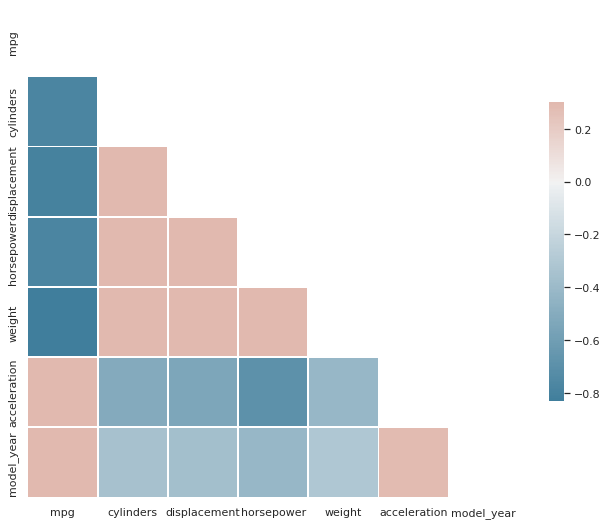

In [ ]:
# Gráfico de correlación de dependencia entre las variables del dataset MPG
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = mpg.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Construir y entrenar un modelo de regresion lineal


In [ ]:
# Definición de variables y cargar desde dataset MPG
vmpg = mpg.iloc[:, 0]
vcyl = mpg.iloc[:, 1]
vdisp= mpg.iloc[:, 2]
vhorse= mpg.iloc[:, 3]
vweight= mpg.iloc[:, 4]
vaccel = mpg.iloc[:, 5]
vmodel = mpg.iloc[:, 6]
vorigin = mpg.iloc[:, 7]

A continuación, se presentan el como entrenar a un modelo de manera genérica y para obtener otros valores, basta con cambiar el nombre de las variables

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


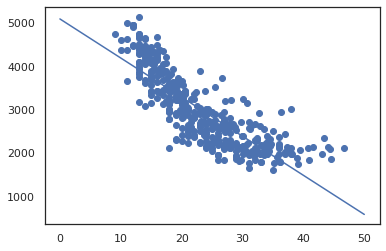

In [ ]:
# Se toma como variables para el modelo las millas por galo vs el peso
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(vmpg[:, np.newaxis], vweight)
vmpgfit = np.linspace(0, 50, 100)
vweightfit = model.predict(vmpgfit[:, np.newaxis])
plt.scatter(vmpg, vweight)
plt.plot(vmpgfit, vweightfit);

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     -90.11698839374367
Model intercept: 5089.487113013488


Mostrar estadisticas del modelo

In [ ]:
# Correlación lineal entre las dos variables
# ==============================================================================
from scipy.stats import pearsonr
corr_test = pearsonr(vmpg, vweight)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.831740933244335
P-value:  2.9727995640500577e-103


Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un scatter plot para pares de variables que resulten interesantes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


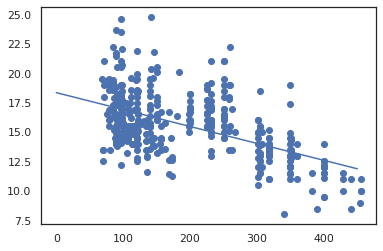

In [ ]:
# (1) Se toma como variables para el desplazamiento vs la aceleracion
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(vdisp[:, np.newaxis], vaccel)
vdispfit = np.linspace(0, 450, 100)
vaccelfit = model.predict(vdispfit[:, np.newaxis])
plt.scatter(vdisp, vaccel)
plt.plot(vdispfit, vaccelfit);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


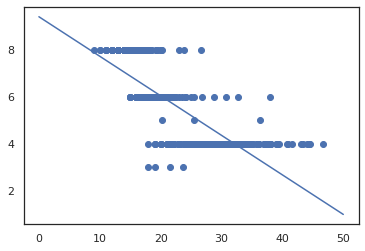

In [ ]:
# (2) Se toma como variables para el modelo las millas por galo vs la cilindrada
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(vmpg[:, np.newaxis], vcyl)
vmpgfit = np.linspace(0, 50, 100)
vcylfit = model.predict(vmpgfit[:, np.newaxis])
plt.scatter(vmpg, vcyl)
plt.plot(vmpgfit, vcylfit);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


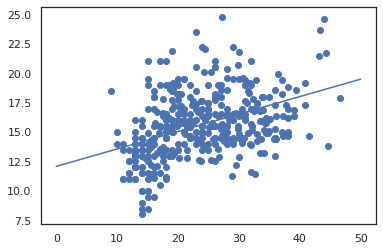

In [ ]:
# Se toma como variables para el modelo las millas por galo vs la aceleración
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(vmpg[:, np.newaxis], vaccel)
vmpgfit = np.linspace(0, 50, 100)
vaccelfit = model.predict(vmpgfit[:, np.newaxis])
plt.scatter(vmpg, vaccel)
plt.plot(vmpgfit, vaccelfit);

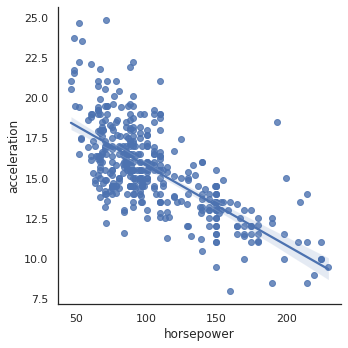

In [ ]:
#Otra forma de visualización mas sencilla se presenta a continuacion
sns.lmplot(x="horsepower", y="acceleration", data=mpg);

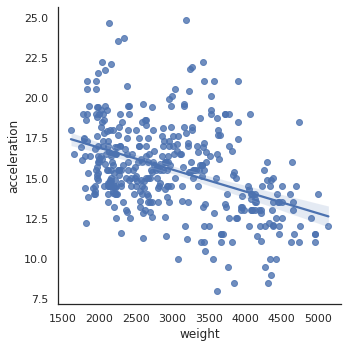

In [ ]:
sns.lmplot(x="weight", y="acceleration", data=mpg);